# Sentinel-3


This notebook explores working with Sentinel-3 data. 

## Sentinel-3 OLCI

https://sentinels.copernicus.eu/web/sentinel/user-guides/sentinel-3-olci

The OLCI dataset provided by Sentinelhub is based on the level-1b products. These products are provided in "instrument" projection rather than being projected into a ground-based reference system. Hence, these products do not come with a 'native' reference system. The openEO collections are currently configured to use EPSG:4326 unprojected coordinates, with a resolution set to a fixed value that tries to approximate the native 300m ground resolution.


In [7]:
import datetime

import openeo
import xarray
import matplotlib.pyplot as plt

In [8]:
conn = openeo.connect("openeo.dataspace.copernicus.eu")
conn.authenticate_oidc()

Authenticated using refresh token.


<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.2/' with OidcBearerAuth>

### Load the collection

In [33]:
conn.describe_collection("SENTINEL3_OLCI_L1B")

{'cube:dimensions': {'bands': {'type': 'bands',
   'values': ['B01',
    'B02',
    'B03',
    'B04',
    'B05',
    'B06',
    'B07',
    'B08',
    'B09',
    'B10',
    'B11',
    'B12',
    'B13',
    'B14',
    'B15',
    'B16',
    'B17',
    'B18',
    'B19',
    'B20',
    'B21']},
  't': {'extent': ['2016-04-17T11:33:13Z', None],
   'step': 'P2D',
   'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [-180, 180],
   'reference_system': 4326,
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [-85, 85],
   'reference_system': 4326,
   'type': 'spatial'}},
 'description': 'Sentinel 3 imagery captured by OLCI sensor',
 'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]},
  'temporal': {'interval': [['2016-04-17T11:33:13Z', None]]}},
 'id': 'SENTINEL3_OLCI_L1B',
 'license': 'proprietary',
 'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/',
   'rel': 'root',
   'type': 'application/json'},
  {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci',
   'rel': 'self',
   'type': 'application/json'},
  {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections',
   'rel': 'parent',
   'type': 'application/json'},
  {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci/queryables',
   'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
   'type': 'application/schema+json'},
  {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci/items',
   'rel': 'items',
   'type': 'application/geo+json'}],
 'providers': [],
 'sci:citation': 'Modified Copernicus Sentinel data [Year]/Sentinel Hub',
 'stac_extensions': ['https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
  'https://stac-extensions.github.io/sat/v1.0.0/schema.json',
  'https://stac-extensions.github.io/eo/v1.0.0/schema.json'],
 'stac_version': '1.0.0',
 'summaries': {'bands': [{'eo:center_wavelength': 0.4, 'name': 'B01'},
   {'eo:center_wavelength': 0.4125, 'name': 'B02'},
   {'eo:center_wavelength': 0.4425, 'name': 'B03'},
   {'eo:center_wavelength': 0.49, 'name': 'B04'},
   {'eo:center_wavelength': 0.51, 'name': 'B05'},
   {'eo:center_wavelength': 0.56, 'name': 'B06'},
   {'eo:center_wavelength': 0.62, 'name': 'B07'},
   {'eo:center_wavelength': 0.665, 'name': 'B08'},
   {'eo:center_wavelength': 0.67375, 'name': 'B09'},
   {'eo:center_wavelength': 0.68125, 'name': 'B10'},
   {'eo:center_wavelength': 0.70875, 'name': 'B11'},
   {'eo:center_wavelength': 0.75375, 'name': 'B12'},
   {'eo:center_wavelength': 0.76125, 'name': 'B13'},
   {'eo:center_wavelength': 0.764375, 'name': 'B14'},
   {'eo:center_wavelength': 0.7675, 'name': 'B15'},
   {'eo:center_wavelength': 0.77875, 'name': 'B16'},
   {'eo:center_wavelength': 0.865, 'name': 'B17'},
   {'eo:center_wavelength': 0.885, 'name': 'B18'},
   {'eo:center_wavelength': 0.9, 'name': 'B19'},
   {'eo:center_wavelength': 0.94, 'name': 'B20'},
   {'eo:center_wavelength': 1.02, 'name': 'B21'}],
  'eo:bands': [{'center_wavelength': 0.4,
    'data_type': 'float32',
    'description': 'Aerosol correction, improved water constituent retrieval',
    'full_width_half_max': 0.015,
    'name': 'B01',
    'openeo:gsd': {'unit': '°', 'value': [0.00297619047619, 0.00297619047619]},
    'statistics': {'maximum': [0.4], 'minimum': [0]}},
   {'center_wavelength': 0.4125,
    'data_type': 'float32',
    'description': 'Yellow substance and detrital pigments (turbidity)',
    'full_width_half_max': 0.01,
    'name': 'B02',
    'openeo:gsd': {'unit': '°', 'value': [0.00297619047619, 0.00297619047619]},
    'statistics': {'maximum': [0.4], 'minimum': [0]}},
   {'center_wavelength': 0.4425,
    'data_type': 'float32',
    'description': 'Chlorophyll absorption maximum, biogeochemistry, vegetation',
    'full_width_half_max': 0.01,
    'name': 'B03',
    'openeo:gsd': {'unit': '°', 'value': [0.00297619047619, 0.00297619047619]},
    'statistics': {'maximu

In [26]:
today = (datetime.datetime.today() - datetime.timedelta(days=1)).strftime('%Y-%m-%d')

In [27]:
bbox = {"west": 27.564697, "south": 34.764179, "east": 33.002930, "north": 37.387617}
sentinel3 = conn.load_collection(
    "SENTINEL3_OLCI_L1B",
    spatial_extent=bbox,
    temporal_extent=[today, today],
    bands=["B08", "B06", "B04"],
)


Let's download this slice of data in netCDF format to give it an initial inspection.

In [28]:
sentinel3.download("sentinel3.nc")

Quick visualisation of the output


In [29]:
ds = xarray.load_dataset("sentinel3.nc")

# Convert xarray DataSet to a (bands, t, x, y) DataArray
data = ds[["B08", "B06", "B04"]].to_array(dim="bands")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.6493431].


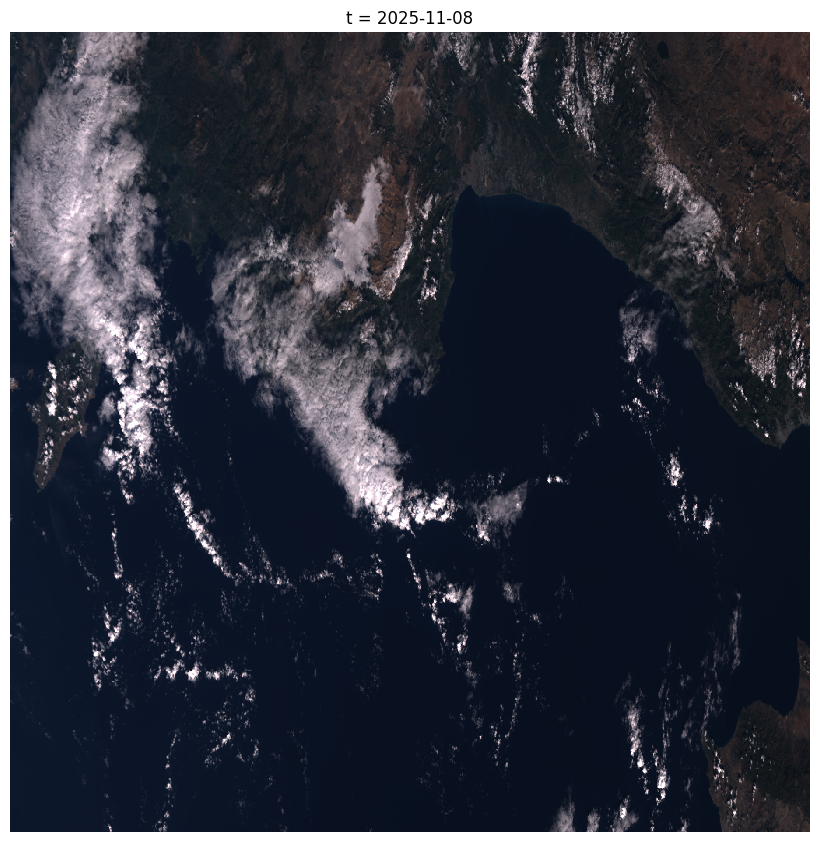

In [30]:
import matplotlib.pyplot as plt

# Create a figure and axis for only the RGB plot
fig, axrgb = plt.subplots(figsize=(8, 8))

# Plot the image
data[{"t": 0}].plot.imshow(ax=axrgb)

# Remove axes, borders, and whitespace
axrgb.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Save the clean image
plt.savefig(f".png", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()
plt.close(fig)
